<a href="https://colab.research.google.com/github/abinashbordoloi/MyColabWork/blob/main/ProjectMekhela/final_model_deep_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import cv2
import imghdr
data_dir = '/content/drive/MyDrive/Project Dataset'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Found 1006 files belonging to 2 classes.


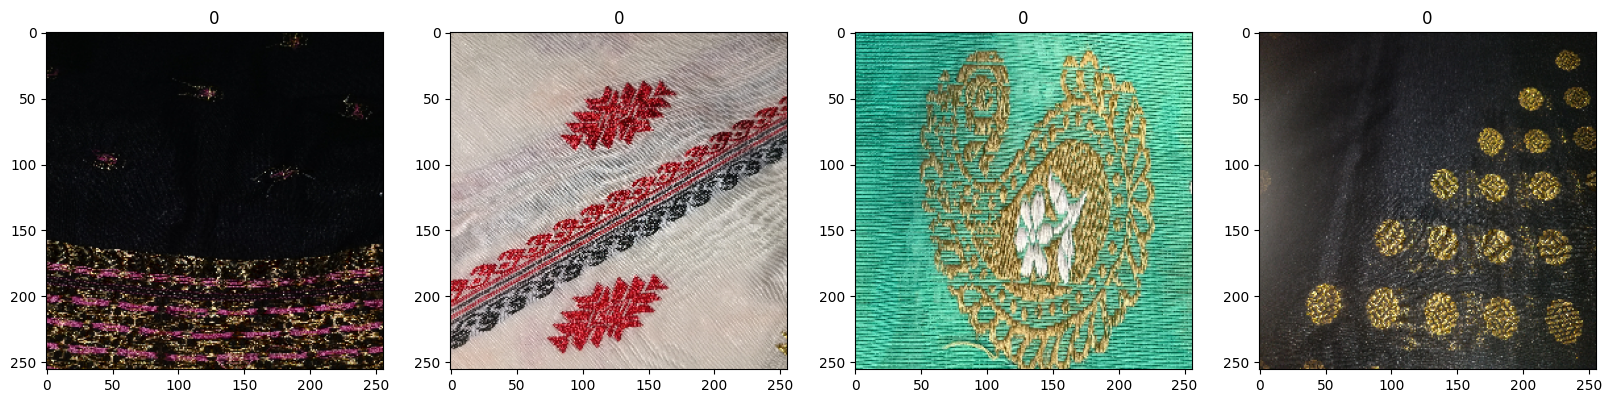

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Project Dataset')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
type(data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
# len(batch[0][3])

In [ ]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.38088235, 0.39558825, 0.        ],
          [0.9014706 , 0.9289216 , 0.28039217],
          [0.54607844, 0.56960785, 0.        ],
          ...,
          [0.67401963, 0.68578434, 0.        ],
          [0.67401963, 0.68578434, 0.        ],
          [0.6642157 , 0.6759804 , 0.        ]],
 
         [[0.8401961 , 0.8730392 , 0.23284313],
          [0.9754902 , 1.        , 0.31813726],
          [0.5833333 , 0.5955882 , 0.0254902 ],
          ...,
          [0.6661765 , 0.6779412 , 0.        ],
          [0.6573529 , 0.6691176 , 0.        ],
          [0.68235296, 0.69411767, 0.00784314]],
 
         [[0.5019608 , 0.5269608 , 0.        ],
          [0.81421566, 0.84607846, 0.16470589],
          [0.7348039 , 0.76617646, 0.05147059],
          ...,
          [0.68284315, 0.69460785, 0.00833333],
          [0.6578431 , 0.6696078 , 0.        ],
          [0.68921566, 0.70098037, 0.01470588]],
 
         ...,
 
         [[0.9264706 , 0.9289216 , 0.38284314],
          [0.98039

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)
train_size

22

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)



In [ ]:
len(data)

32

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
len(val)

6

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
logdir='/content/drive/MyDrive/project_sroita_log_file/logs_20-05-2024-21:09'

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

# # Evaluate the model on test data
# test_generator = validation_datagen.flow_from_directory(
#     test,
#     target_size=(150, 150),
#     batch_size=32,
#     class_mode='binary'  # 'categorical' if more than two classes
# )



Epoch 1/50
 6/22 [=======>......................] - ETA: 1:11 - loss: 0.0021 - accuracy: 1.0000

KeyboardInterrupt: 

In [ ]:

# # Evaluate the model on the test set
# test_loss, test_accuracy = model.evaluate(test)

# # Print the test loss and accuracy
# print(f"Test Loss: {test_loss}")
# print(f"Test Accuracy: {test_accuracy}")

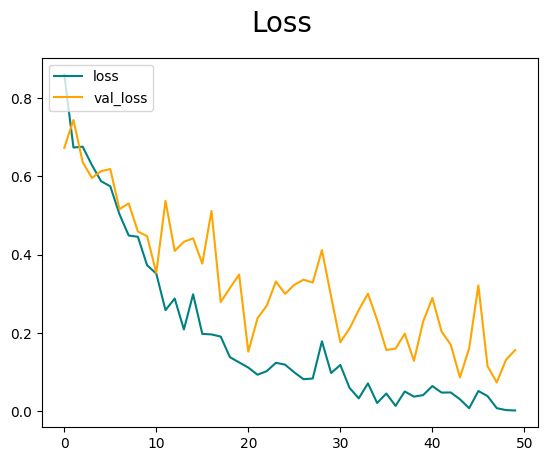

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

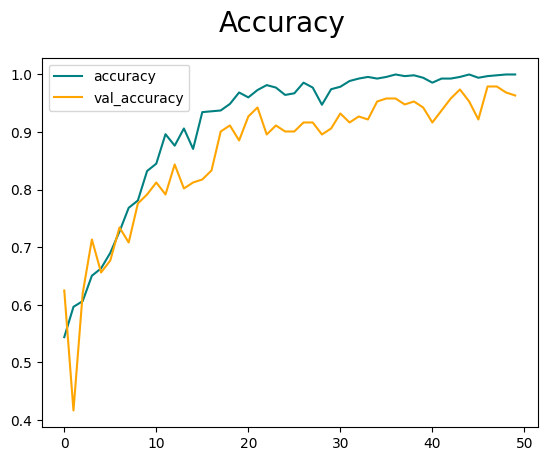

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 328ms/step
tf.Tensor(0.9130435, shape=(), dtype=float32) tf.Tensor(0.9767442, shape=(), dtype=float32) tf.Tensor(0.9479167, shape=(), dtype=float32)


In [ ]:
print(f"Test-Precision: {pre.result().numpy():.4f}")
print(f"Test-Recall: {re.result().numpy():.4f}")
print(f"Test-Accuracy: {acc.result().numpy():.4f}")


Test-Precision: 0.9130
Test-Recall: 0.9767
Test-Accuracy: 0.9479


In [ ]:
# import cv2
# img = cv2.imread('/content/drive/MyDrive/MekhelaSador_dataset/train/powerloom/P11_B.jpg')
# plt.imshow(img)
# plt.show()

In [ ]:
# resize = tf.image.resize(img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# # plt.show()

In [ ]:
# yhat = model.predict(np.expand_dims(resize/255, 0))
# yhat

In [ ]:
# if yhat > 0.5:
#     print(f'Predicted class is Powerloom')
# else:
#     print(f'Predicted class is Handloom')

In [ ]:
from tensorflow.keras.models import load_model
model.save(os.path.join('/content/drive/MyDrive/models','imageclassifier_20-05-2024_23.46_97_close.h5'))


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('/content/drive/MyDrive/models/imageclassifier_20-05-2024_23.46_97_close.h5')
# new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 108ms/step


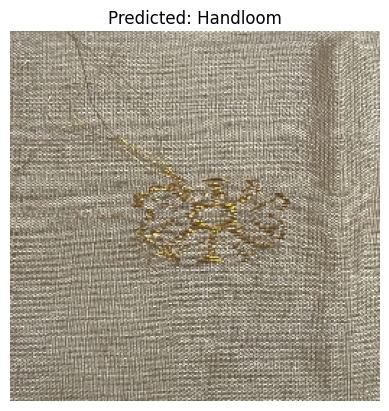

Confidence Percentage: 98.29


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path = '/content/drive/MyDrive/dataset_mekhela/Mekhela/Handloom/H15_B.jpg' # Replace with the path to your image
img = cv2.imread(image_path)
resized_img = cv2.resize(img, (256, 256))  # Resize the image to match the model's input shape
normalized_img = resized_img / 255.0  # Normalize pixel values between 0 and 1

# Expand the dimensions to match the model's input shape
input_image = np.expand_dims(normalized_img, axis=0)

# Make predictions using the preprocessed image
prediction = new_model.predict(input_image)

# Convert the prediction to a human-readable label
predicted_label = "Powerloom" if prediction > 0.5 else "Handloom"
confidence = prediction if prediction > 0.5 else 1 - prediction

# Display the image and predicted label
plt.imshow(resized_img[:,:,::-1])  # Show the image (OpenCV reads images in BGR format, so using ::-1 to convert to RGB)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()

print(f"Confidence Percentage: {(confidence[0][0]*100):.2f}")


In [ ]:
# Assuming you have a test set 'test' with images and labels
# Example code for obtaining predicted and true labels

# Initialize empty lists for storing true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test set and make predictions
for batch in test.as_numpy_iterator():
    X, y = batch  # X is the image data, y is the true label
    yhat = model.predict(X)  # Get model predictions
    predicted_labels.extend(yhat.flatten().tolist())  # Append predictions to the predicted_labels list
    true_labels.extend(y.tolist())  # Append true labels to the true_labels list

# Convert predicted probabilities to binary predictions (0 or 1)
predicted_labels = [1 if pred > 0.5 else 0 for pred in predicted_labels]


1/1 [==============================] - 0s 342ms/step


In [ ]:
predicted_labels

[0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1]

In [ ]:
true_labels

[0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1]

In [ ]:
print(len(predicted_labels))
print(len(true_labels))

96
96


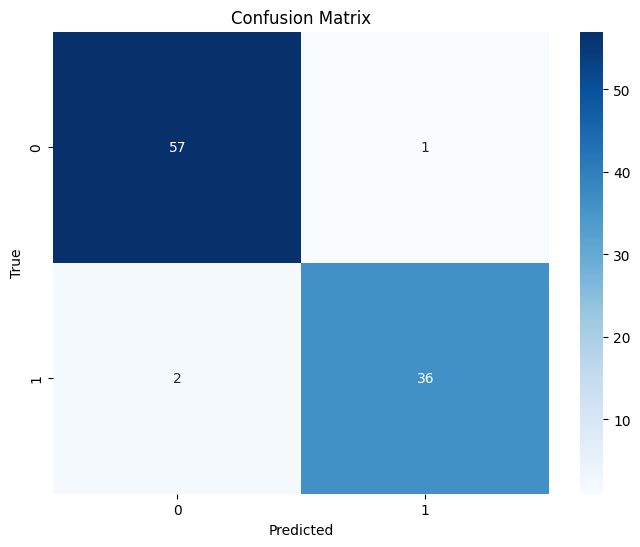

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plotting confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Assuming you have obtained the confusion matrix 'cm'
# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

# Display the computed evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9688
Precision: 0.9730
Recall: 0.9474
F1 Score: 0.9600


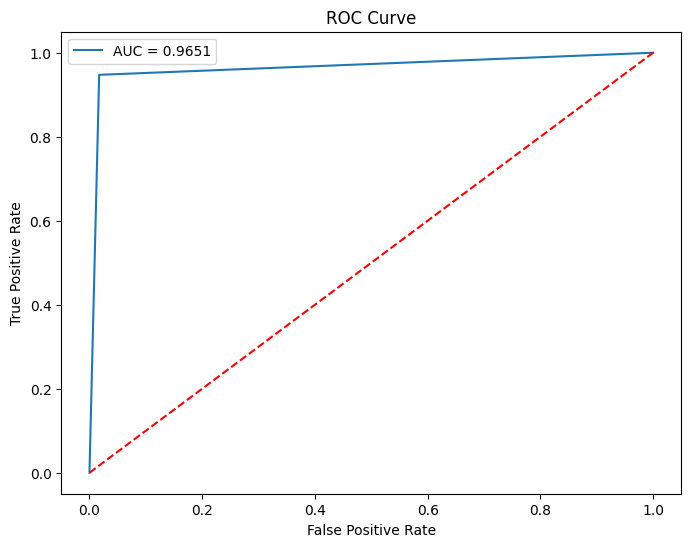

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(true_labels, predicted_labels)
auc = roc_auc_score(true_labels, predicted_labels)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


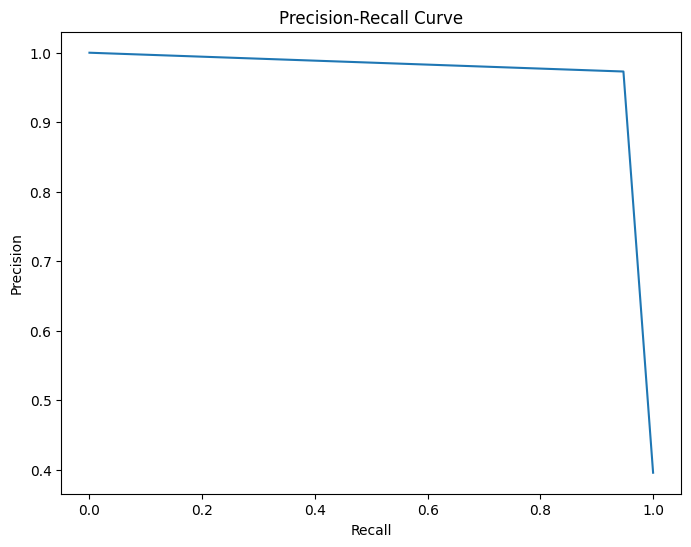

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(true_labels, predicted_labels)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


1/1 [==============================] - 0s 312ms/step


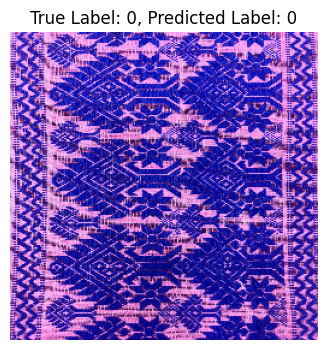

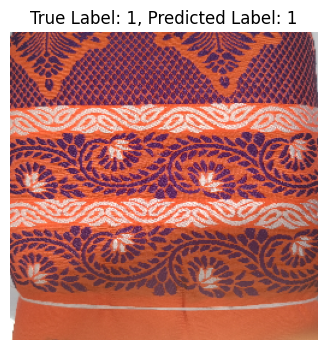

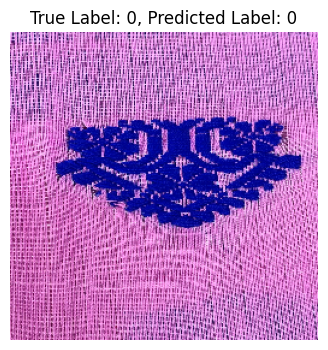

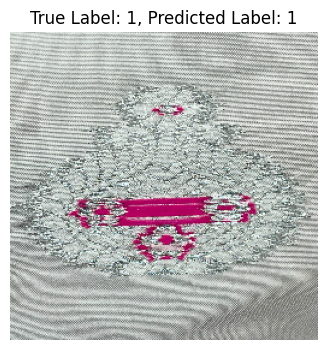

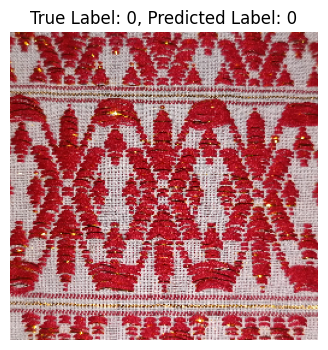

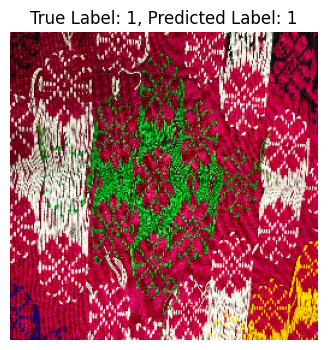

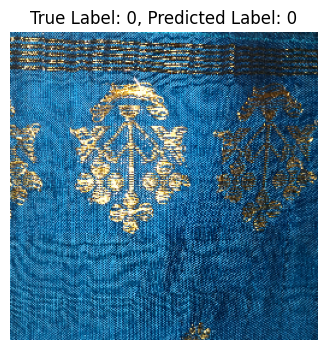

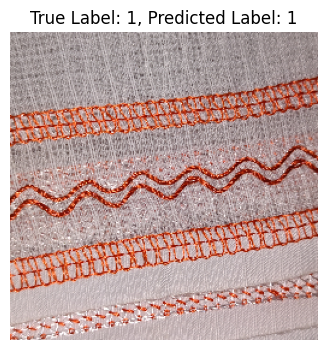

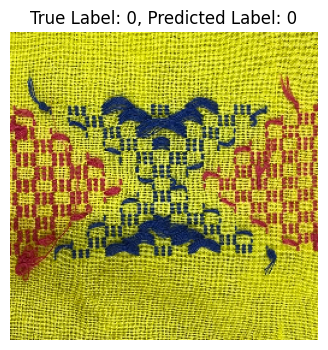

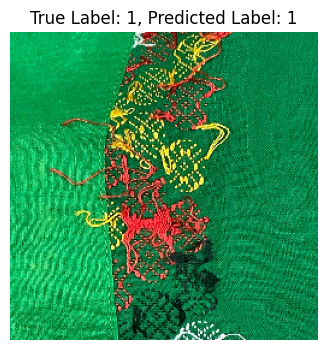

In [ ]:
# Assuming 'test' is your processed test dataset with batches
num_samples = 10  # Number of samples to display

for batch in test.take(1):  # Assuming you want to visualize the first batch
    images, true_labels = batch


    predictions = model.predict(images)
    dis_predicted_labels = (predictions > 0.5).astype(int).flatten()

    for i in range(num_samples):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[i])
        plt.title(f"True Label: {true_labels[i].numpy()}, Predicted Label: {dis_predicted_labels[i]}")
        plt.axis("off")
        plt.show()



In [ ]:

# model.summary()

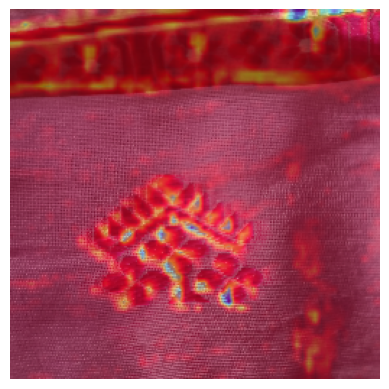

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def get_gradcam(image_path, model, last_conv_layer_name='conv2d_2'):
    img = image.load_img(image_path, target_size=(256, 256))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_tensor)
        class_output = preds[:, 0]  # Consider binary classification, change this if needed
        grads = tape.gradient(class_output, last_conv_layer_output)
        pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, last_conv_layer_output), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = heatmap[0]
    img = image.img_to_array(img)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    superimposed_img = cv2.addWeighted(img.astype('uint8'), 0.6, heatmap, 0.4, 0)
    return superimposed_img

# Replace 'image_path' with the path to an image from your test set
gradcam_image = get_gradcam("/content/drive/MyDrive/FInal_Year_project_Mekhela/Handloom/Handloom/H2_F.jpg", model)

# Plot the Grad-CAM visualization
plt.imshow(gradcam_image)
plt.axis('off')
plt.show()


1/1 [==============================] - 0s 91ms/step


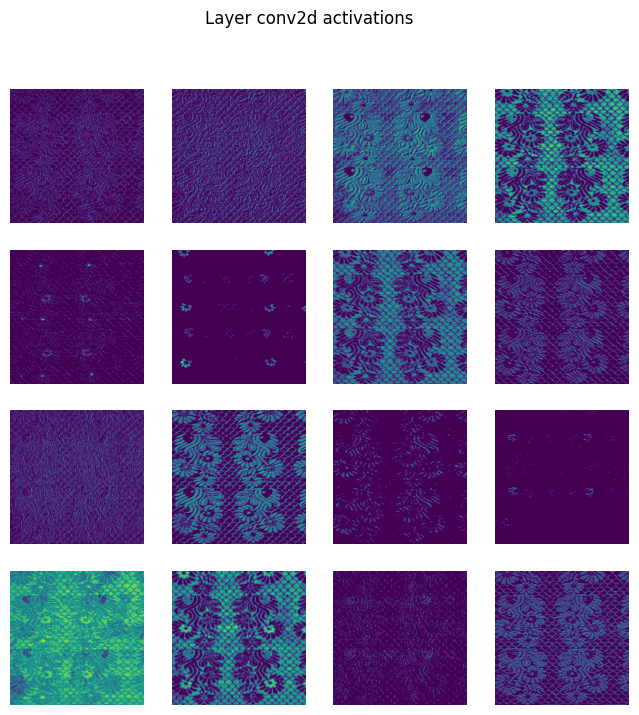

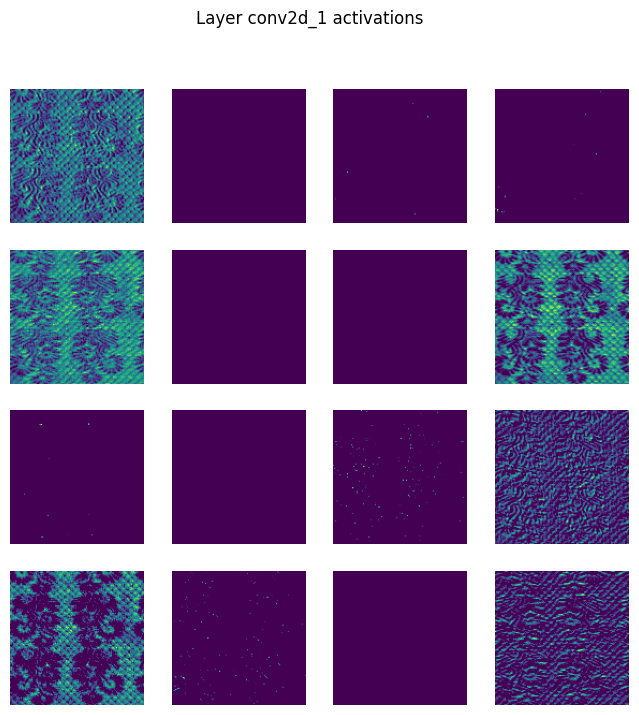

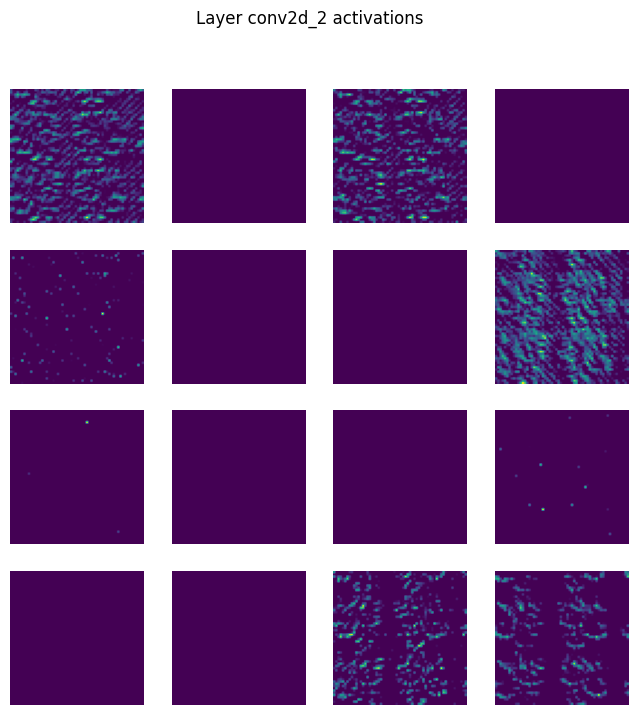

In [ ]:
def visualize_activations(image_tensor, model, layer_names):
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=[model.get_layer(layer_name).output for layer_name in layer_names])
    activations = activation_model.predict(image_tensor)

    for i, activation in enumerate(activations):
        plt.figure(figsize=(8, 8))
        for j in range(16):  # Change this value based on the number of filters in the layer
            plt.subplot(4, 4, j+1)
            plt.imshow(activation[0, :, :, j], cmap='viridis')  # Change the index for different filter visualizations
            plt.axis('off')
        plt.suptitle(f'Layer {layer_names[i]} activations')
        plt.show()

# Assuming 'test' is your test dataset with images and labels
image_sample = next(iter(test))[0][:1]  # Consider the first image in the dataset
layer_names = ['conv2d', 'conv2d_1', 'conv2d_2']  # Specify layer names for visualization

visualize_activations(image_sample, model, layer_names)


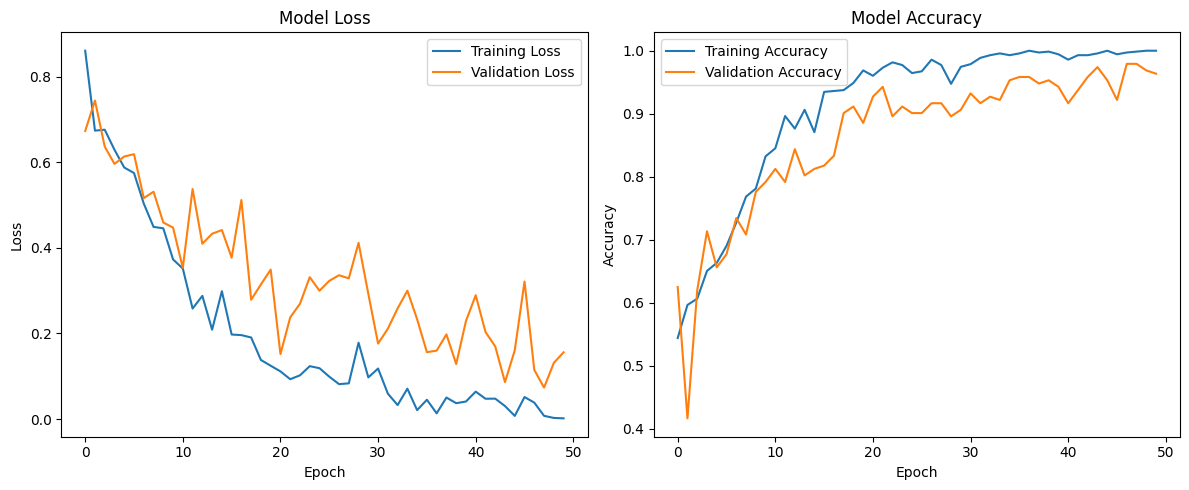

In [ ]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
type(test)

tensorflow.python.data.ops.take_op._TakeDataset

In [ ]:
test

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
# # Assuming 'test' is your test dataset with images and labels
# num_errors_to_display = 5

# error_count = 0
# for image, true_label in test:
#     prediction = model.predict(image)
#     predicted_label = 1 if prediction > 0.5 else 0

#     if predicted_label != true_label.numpy():
#         plt.figure(figsize=(4, 4))
#         plt.imshow(image[0].numpy().astype("uint8"))
#         plt.title(f"True Label: {true_label.numpy()}, Predicted Label: {predicted_label}")
#         plt.axis("off")
#         plt.show()

#         error_count += 1
#         if error_count >= num_errors_to_display:
#             break

# Assuming 'test' is your test dataset with images and labels
# num_errors_to_display = 5

# error_count = 0
# for image, true_label in test:
#     prediction = model.predict(image)
#     predicted_label = 1 if prediction > 0.5 else 0

#     if predicted_label != true_label.numpy():
#         plt.figure(figsize=(4, 4))
#         plt.imshow(image[0].numpy().astype("uint8"))
#         plt.title(f"True Label: {true_label.numpy()}, Predicted Label: {predicted_label}")
#         plt.axis("off")
#         plt.show()

#         error_count += 1
#         if error_count >= num_errors_to_display:
#             break



1/1 [==============================] - 0s 32ms/step


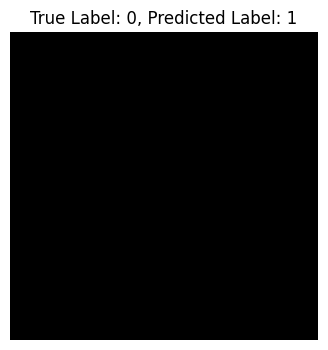

1/1 [==============================] - 0s 29ms/step


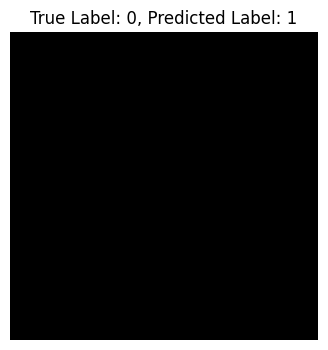

1/1 [==============================] - 0s 30ms/step


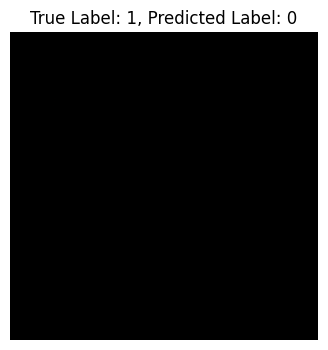

Misqualified Images(Erros):3


In [ ]:
# Assuming you have a trained model named 'model'

num_errors_to_display = 5
error_count = 0

for image, true_label in test:
    prediction = model.predict(image)
    predicted_label = 1 if prediction[0] > 0.5 else 0

    if predicted_label != true_label.numpy()[0]:  # Extracting the single value from tensor
        plt.figure(figsize=(4, 4))
        plt.imshow(image[0].numpy().astype("uint8"))
        plt.title(f"True Label: {true_label.numpy()[0]}, Predicted Label: {predicted_label}")
        plt.axis("off")
        plt.show()

        error_count += 1
        if error_count >= num_errors_to_display:
            break
print(f"Misqualified Images(Erros):{error_count}")

In [ ]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Create an interactive confusion matrix plot
fig = ff.create_annotated_heatmap(conf_matrix, x=['Predicted 0', 'Predicted 1'],
                                  y=['Actual 0', 'Actual 1'], colorscale='Viridis')
fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted label', yaxis_title='True label')
fig.show()

In [ ]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr, tpr, _ = roc_curve(true_labels, predicted_labels)

# Plot interactive ROC curve
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', line=dict(color='orange', width=2),
                         name='ROC curve'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', line=dict(color='navy', width=2, dash='dash'),
                         name='Random'))
fig.update_layout(title='ROC Curve', xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()


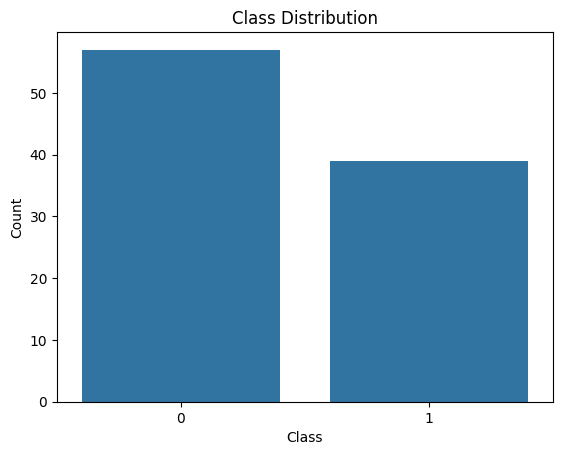

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'true_labels' is your TensorFlow tensor
true_labels_array = np.array(true_labels)
sns.countplot(x=true_labels_array)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



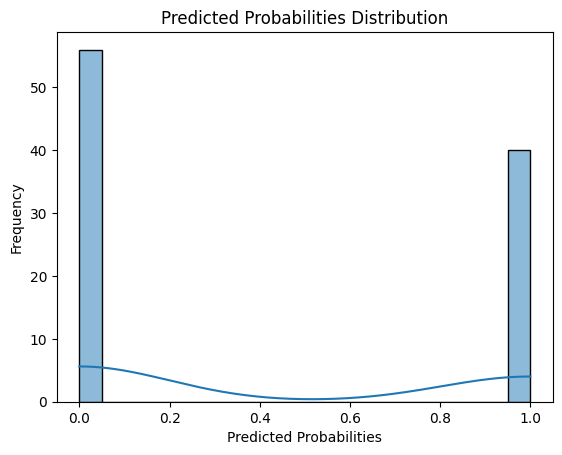

In [ ]:
sns.histplot(predicted_labels, kde=True, bins=20)
plt.title('Predicted Probabilities Distribution')
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.show()


In [ ]:
!kill 16644
%load_ext tensorboard
%tensorboard --logdir=/content/drive/MyDrive/project_sroita_log_file/logs_20-05-2024-15:42 --port=6007 --load_first true
%reload_ext tensorboard


/bin/bash: line 1: kill: (16644) - No such process
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2024-05-20 12:15:55.285547: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 12:15:55.285615: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 12:15:55.286802: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-20 12:15:56.306715: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--load_f

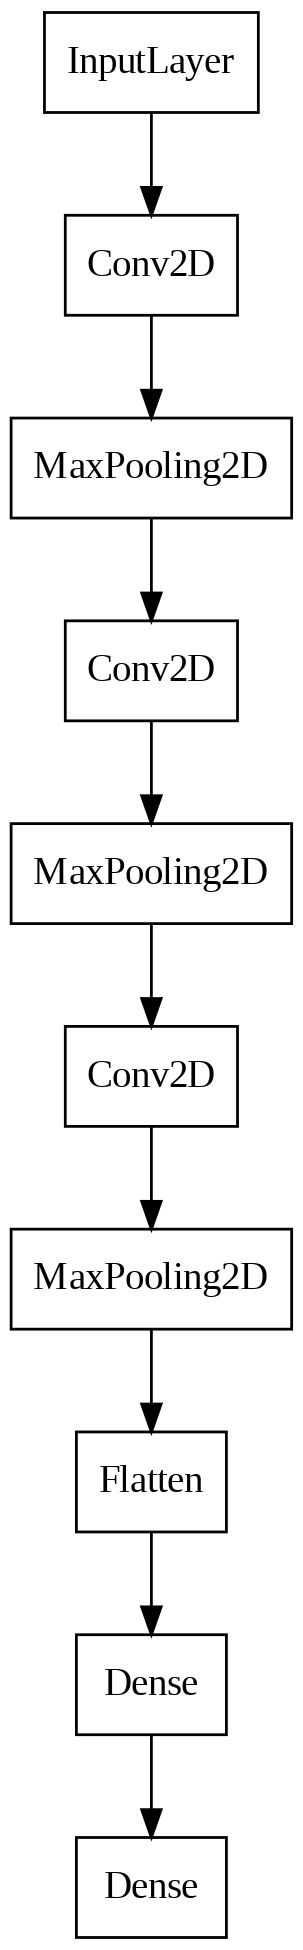

In [ ]:
tf.keras.utils.plot_model(
    new_model,
    to_file='model.png',
    show_shapes=False,
    show_dtype=False,
    show_layer_names=False,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=False,
    show_trainable=False
)

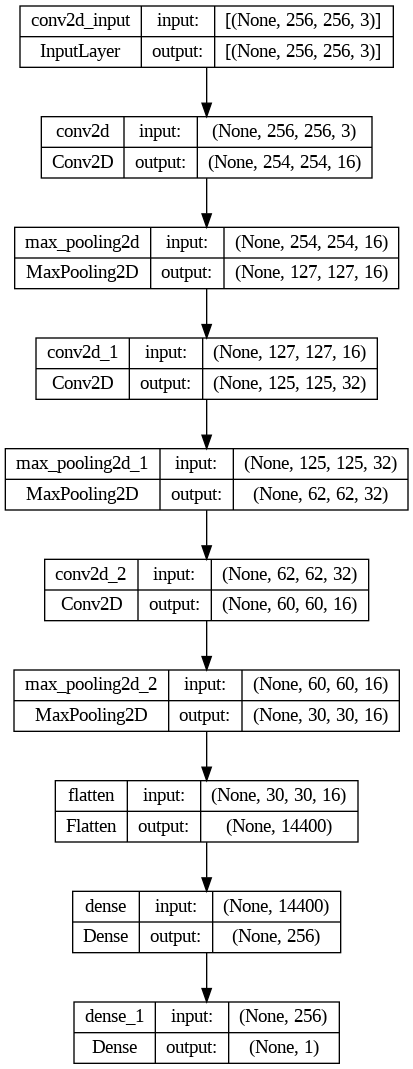

In [ ]:
dot_img_file = 'model.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)